### [ 평균/가중평균/절사평균]

In [8]:
## 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
## =========================================
## 임의 데이터 생성
## =========================================
## (1) 모집단(population) 생성
##- 랜덤 시드 고정 (재현 가능)
np.random.seed(42)

##- 모집단 크기, 그룹별 표본 비율
N       = 100_000            
prop_A  = 0.8                   # A 80%
prop_B  = 0.2                   # B 20%

##- 그룹별 표본 수
n_A     = int(N * prop_A)       
n_B     = int(N * prop_B)


##- 키 분포 (cm) 가정: A ~ N(175, 7), B ~ N(162, 6)
heights_A = np.random.normal(loc=175, scale=7, size=n_A)
heights_B = np.random.normal(loc=162, scale=6, size=n_B)

##- 데이터프레임 생성
population = pd.DataFrame(  { "height": np.concatenate([heights_A, heights_B]),
                              "group":  ["A"] * n_A + ["B"] * n_B  
                            })

print("=== 모집단 기본 정보 ===")
print(population.groupby("group")["height"].agg(["mean", "std", "count"]))
print("모집단 전체 평균:", population["height"].mean())

=== 모집단 기본 정보 ===
             mean       std  count
group                             
A      175.008458  7.008825  80000
B      162.000007  5.997060  20000
모집단 전체 평균: 172.40676784945921


In [10]:
## =========================================
## (2) 대표성 있는 표본 vs 없는 표본
## =========================================

##- 표본 크기
sample_size = 200

##- 대표성 있는 표본: 모집단에서 단순 랜덤 샘플
sample_random = population.sample(n=sample_size, replace=False, random_state=1)

# (2) 대표성 없는 표본: B그룹을 과도하게 많이 뽑는 상황
#    예: B에서 60%, A에서 40%를 샘플링
biased_n_B = int(sample_size * 0.6)
biased_n_A = sample_size - biased_n_B

sample_biased_A = population[population["group"] == "A"].sample(
    n=biased_n_A, replace=False, random_state=2
)
sample_biased_B = population[population["group"] == "B"].sample(
    n=biased_n_B, replace=False, random_state=3
)
sample_biased = pd.concat([sample_biased_A, sample_biased_B]).reset_index(drop=True)

print("\n=== 대표성 있는 표본(랜덤 샘플) 그룹 비율 ===")
print(sample_random["group"].value_counts(normalize=True))

print("\n=== 대표성 없는 표본(편향 샘플) 그룹 비율 ===")
print(sample_biased["group"].value_counts(normalize=True))

print("\n=== 표본별 평균 ===")
print("랜덤 샘플 평균:", sample_random["height"].mean())
print("편향 샘플 평균:", sample_biased["height"].mean())
print("모집단    평균:", population["height"].mean())


=== 대표성 있는 표본(랜덤 샘플) 그룹 비율 ===
group
A    0.78
B    0.22
Name: proportion, dtype: float64

=== 대표성 없는 표본(편향 샘플) 그룹 비율 ===
group
B    0.6
A    0.4
Name: proportion, dtype: float64

=== 표본별 평균 ===
랜덤 샘플 평균: 171.9458174459172
편향 샘플 평균: 167.01716058699796
모집단    평균: 172.40676784945921


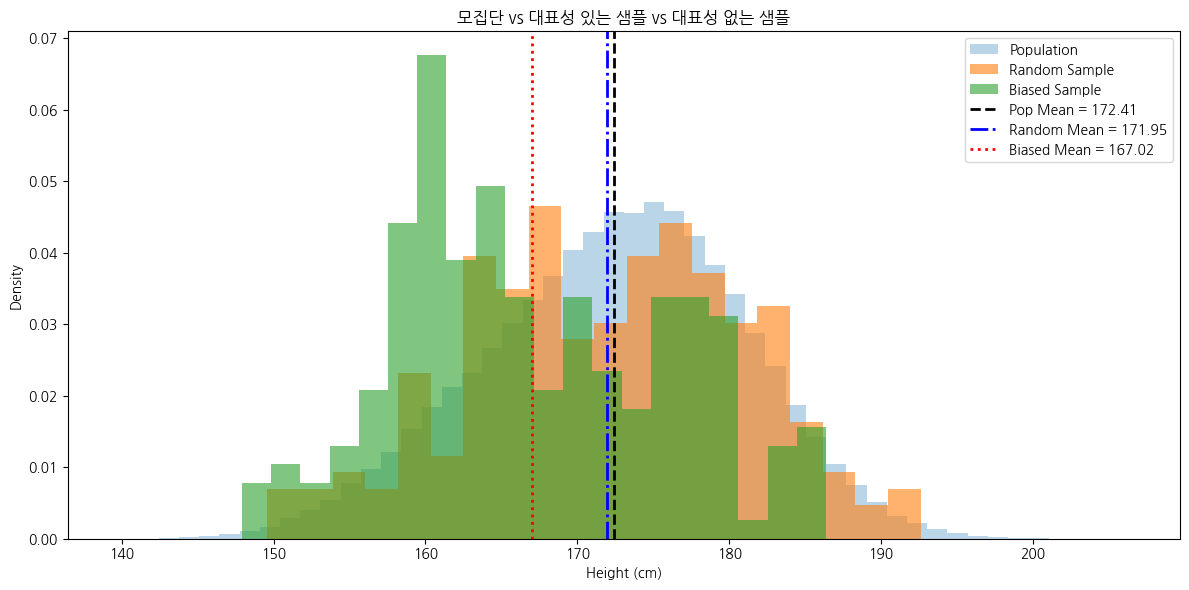

In [12]:
## =========================================
## (3) 시각화 1: 모집단 vs 두 표본의 분포
## =========================================

plt.figure(figsize=(12, 6))

# 모집단 분포 히스토그램
plt.hist(population["height"], bins=50, alpha=0.3, label="Population", density=True)

# 랜덤 표본 분포
plt.hist(sample_random["height"], bins=20, alpha=0.6, label="Random Sample", density=True)

# 편향 표본 분포
plt.hist(sample_biased["height"], bins=20, alpha=0.6, label="Biased Sample", density=True)

# 평균선 그리기
pop_mean = population["height"].mean()
rand_mean = sample_random["height"].mean()
biased_mean = sample_biased["height"].mean()

plt.axvline(pop_mean, color="black", linestyle="--", linewidth=2, label=f"Pop Mean = {pop_mean:.2f}")
plt.axvline(rand_mean, color="blue", linestyle="-.", linewidth=2, label=f"Random Mean = {rand_mean:.2f}")
plt.axvline(biased_mean, color="red", linestyle=":", linewidth=2, label=f"Biased Mean = {biased_mean:.2f}")

plt.title("모집단 vs 대표성 있는 샘플 vs 대표성 없는 샘플")
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

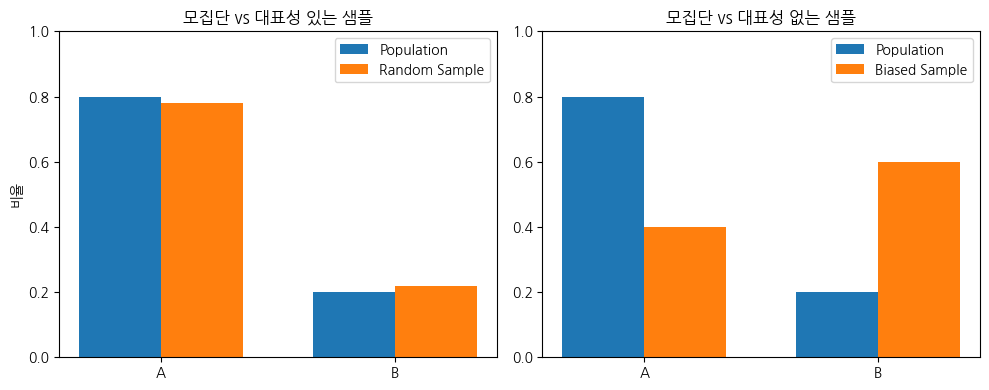

In [13]:
## =========================================
## (4) 시각화 2: 그룹 비율 비교 (대표성 문제)
## =========================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# (왼쪽) 모집단 vs 랜덤 샘플 그룹 비율
pop_group_ratio = population["group"].value_counts(normalize=True)
rand_group_ratio = sample_random["group"].value_counts(normalize=True)

x1 = np.arange(len(pop_group_ratio.index))  # [0,1,...]
width = 0.35

ax[0].bar(x1 - width/2, pop_group_ratio.values, width=width, label="Population")
ax[0].bar(x1 + width/2, rand_group_ratio.reindex(pop_group_ratio.index).values, 
          width=width, label="Random Sample")

ax[0].set_xticks(x1)
ax[0].set_xticklabels(pop_group_ratio.index)
ax[0].set_ylim(0, 1)
ax[0].set_title("모집단 vs 대표성 있는 샘플")
ax[0].set_ylabel("비율")
ax[0].legend()

# (오른쪽) 모집단 vs 편향 샘플 그룹 비율
biased_group_ratio = sample_biased["group"].value_counts(normalize=True)

x2 = np.arange(len(pop_group_ratio.index))
ax[1].bar(x2 - width/2, pop_group_ratio.values, width=width, label="Population")
ax[1].bar(x2 + width/2, biased_group_ratio.reindex(pop_group_ratio.index).values,
          width=width, label="Biased Sample")

ax[1].set_xticks(x2)
ax[1].set_xticklabels(pop_group_ratio.index)
ax[1].set_ylim(0, 1)
ax[1].set_title("모집단 vs 대표성 없는 샘플")
ax[1].legend()

plt.tight_layout()
plt.show()


In [19]:
## =========================================
## (5) 대표성 문제 보정: 가중평균
## =========================================
print("\n=== 대표성 문제 보정: 가중평균 ===")

# 모집단의 실제 그룹 비율 (참값)
true_prop = pop_group_ratio.to_dict()  # {'A':0.8, 'B':0.2}

# 편향 샘플에서 그룹 별 평균 키
biased_group_mean = sample_biased.groupby("group")["height"].mean()

print("\n편향 샘플 - 그룹별 평균 키:")
print(biased_group_mean)

# (1) 편향 샘플의 단순 평균 (representativeness 문제가 있는 값)
biased_simple_mean = sample_biased["height"].mean()
print("\n편향 샘플 단순 평균        :", biased_simple_mean)

# (2) 모집단 비율을 사용한 가중평균 (보정 값)
weighted_mean = 0
for g in ["A", "B"]:
    weighted_mean += true_prop[g] * biased_group_mean[g]

print("모집단 비율로 보정한 가중평균:", weighted_mean)
print("모집단 진짜 평균           :", pop_mean)

# 비교용 출력
print("\n[비교]")
print(f"모집단 평균              : {pop_mean:.3f}")
print(f"랜덤 샘플 평균           : {rand_mean:.3f}")
print(f"편향 샘플 평균           : {biased_simple_mean:.3f}")
print(f"편향 샘플 가중평균(보정)  : {weighted_mean:.3f}")



=== 대표성 문제 보정: 가중평균 ===

편향 샘플 - 그룹별 평균 키:
group
A    174.985860
B    161.704694
Name: height, dtype: float64

편향 샘플 단순 평균        : 167.01716058699796
모집단 비율로 보정한 가중평균: 172.3296266923473
모집단 진짜 평균           : 172.40676784945921

[비교]
모집단 평균              : 172.407
랜덤 샘플 평균           : 171.946
편향 샘플 평균           : 167.017
편향 샘플 가중평균(보정)  : 172.330
